# Instacart Market Basket Analysis

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [92]:
aisles_df = pd.read_csv("/content/drive/MyDrive/Instacart/Instacart_dataset/aisles.csv")
departments_df = pd.read_csv("/content/drive/MyDrive/Instacart/Instacart_dataset/departments.csv")
orders_df = pd.read_csv('/content/drive/MyDrive/Instacart/Instacart_dataset/orders.csv')
products_df = pd.read_csv("/content/drive/MyDrive/Instacart/Instacart_dataset/products.csv")
order_prior_df = pd.read_csv("/content/drive/MyDrive/Instacart/Instacart_dataset/order_products__prior.csv")
order_train_df = pd.read_csv("/content/drive/MyDrive/Instacart/Instacart_dataset/order_products__train.csv")

In [93]:
print("size of products oredered prior", order_prior_df.shape)
print("size of products oredered train", order_train_df.shape)

size of products oredered prior (32434489, 4)
size of products oredered train (1384617, 4)


In [94]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [95]:
grouped  = pd.concat([order_prior_df,order_train_df],axis=0)

In [96]:
grouped

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [97]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.000
2,473747,1,prior,3,3,12,21.000
3,2254736,1,prior,4,4,7,29.000
4,431534,1,prior,5,4,15,28.000


In [98]:
order_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [99]:
grouped_products = len(set(grouped["product_id"]))
grouped_orders = len(set(grouped["order_id"]))

print("Total Number of Products %s and Number of Orders %s" %(grouped_products,grouped_orders))

Total Number of Products 49685 and Number of Orders 3346083


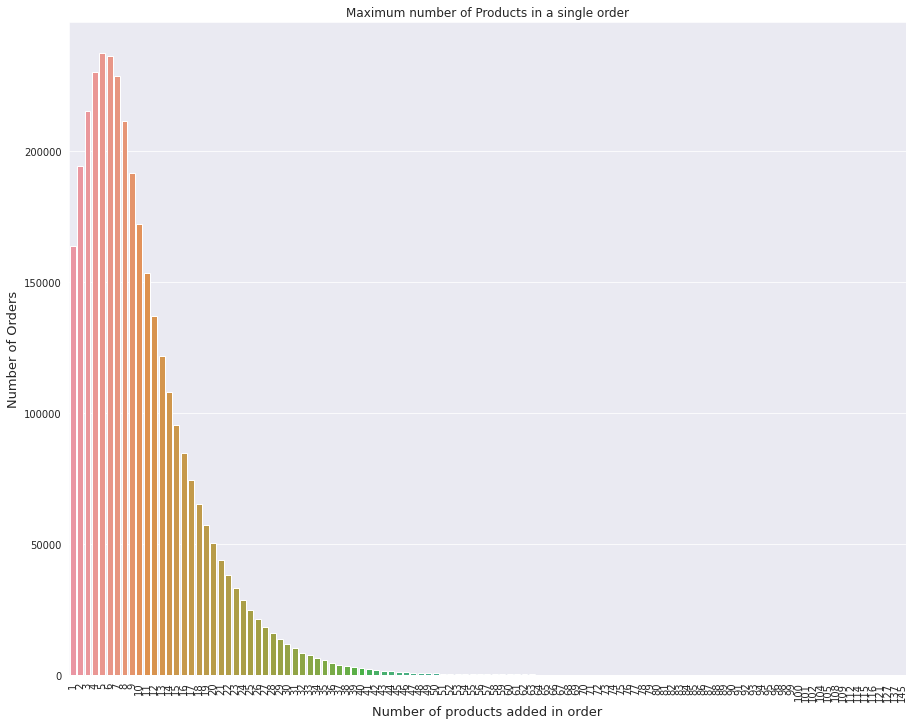

In [100]:
#Maximum number of products in a single order
grouped_max = grouped.groupby("order_id")["add_to_cart_order"].agg("max").reset_index()
grouped_max = grouped_max.add_to_cart_order.value_counts()
fig, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation=90)
sns.barplot(grouped_max.index,grouped_max.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
plt.title("Maximum number of Products in a single order")
plt.show()

In [101]:
grouped_max = grouped.groupby("product_id")["reordered"].agg("count").reset_index()

In [102]:
grouped_max = grouped_max.merge(products_df[['product_id','product_name']], on=["product_id"], how="right")

In [103]:
grouped_max = grouped_max.sort_values(by="reordered",ascending=False)[:10]

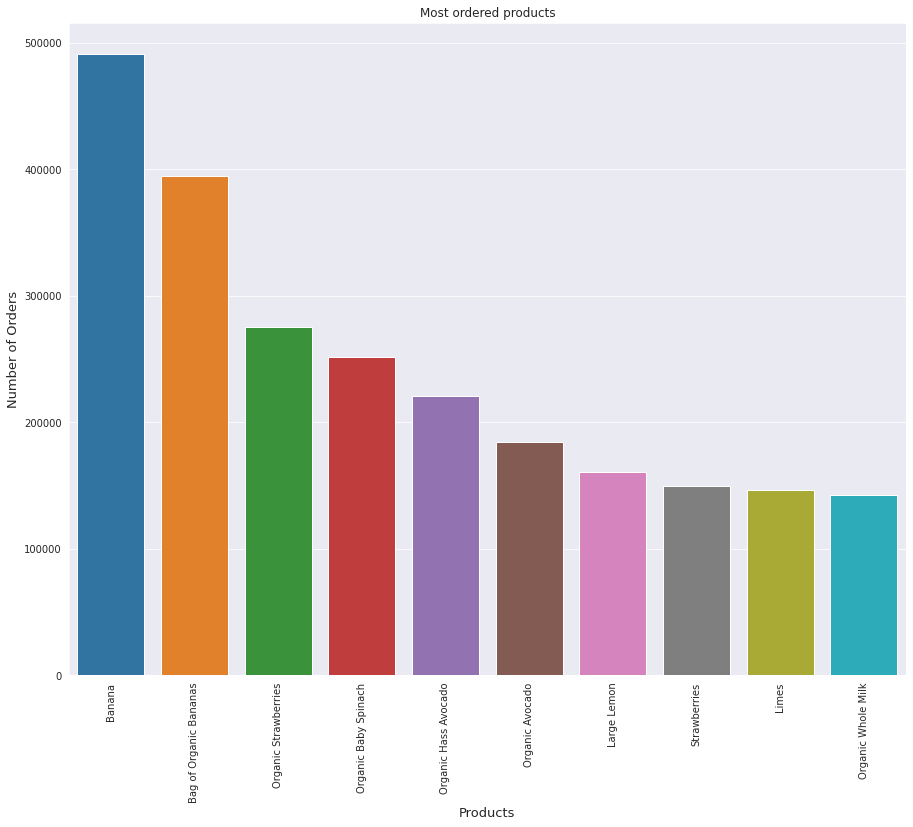

In [104]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation=90)
sns.barplot(grouped_max["product_name"],grouped_max["reordered"])
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Products', fontsize=13)
plt.title("Most ordered products")
plt.show()

In [105]:
grouped_ratio = grouped.groupby("reordered")["product_id"].agg("count").reset_index()
print(grouped_ratio)

   reordered  product_id
0          0    13863746
1          1    19955360


In [106]:
grouped_ratio["ratio"] = grouped_ratio["product_id"].apply(lambda x : x/grouped_ratio["product_id"].sum())

In [107]:
grouped_ratio

,reordered,product_id,ratio
0,0,13863746,0.410
1,1,19955360,0.590


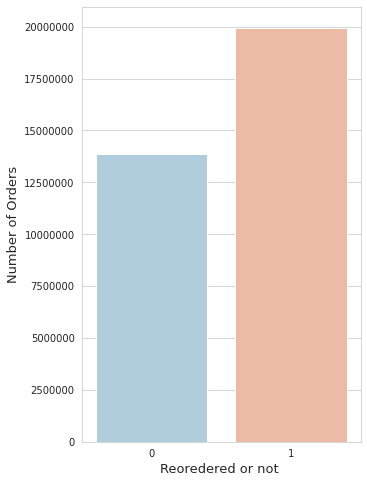

In [108]:

grouped_ratio  = grouped_ratio.groupby(['reordered']).sum()['product_id'].sort_values(ascending=False)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(5,8))
sns.barplot(grouped_ratio.index, grouped_ratio.values, palette='RdBu_r')
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Reoredered or not ', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [109]:
grouped_product = grouped.groupby("product_id")["reordered"].agg(reorder_sum ='sum', reorder_total = 'count').reset_index()
grouped_product["percent"] = grouped_product["reorder_sum"]/grouped_product["reorder_total"]*100
grouped_product = grouped_product[grouped_product['reorder_total']>75]
grouped_product = grouped_product.merge(products_df[['product_id','product_name']], on=["product_id"], how="left")
grouped_product = grouped_product.sort_values(by = "percent", ascending = False)[:10]
grouped_product  = grouped_product.groupby(['product_name']).sum()['percent'].sort_values(ascending=False)

In [110]:
grouped_product

product_name
Serenity Ultimate Extrema Overnight Pads                      93.333
Chocolate Love Bar                                            92.157
Maca Buttercups                                               89.423
Benchbreak Chardonnay                                         89.189
Organic Blueberry B Mega                                      88.889
Fragrance Free Clay with Natural Odor Eliminator Cat Litter   87.023
Thousand Island Salad Snax                                    86.842
Classic Carbonated Natural Mineral Water                      86.667
Real2 Alkalized Water 500 ml                                  86.214
Half And Half Ultra Pasteurized                               86.144
Name: percent, dtype: float64

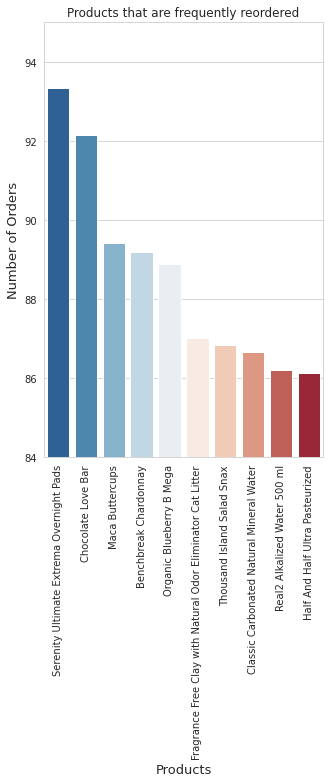

In [111]:

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(5,8))
sns.barplot(grouped_product.index,grouped_product.values, palette='RdBu_r')
plt.ylabel('Number of Orders', fontsize=13)
plt.xticks(rotation=90)
plt.xlabel('Products', fontsize=13)
plt.title("Products that are frequently reordered")
plt.ylim(84,95)

plt.show()

In [112]:
orders_df = pd.read_csv('/content/drive/MyDrive/Instacart/Instacart_dataset/orders.csv')

In [113]:
print(orders_df.shape)
print(orders_df.columns.values)

(3421083, 7)
['order_id' 'user_id' 'eval_set' 'order_number' 'order_dow'
 'order_hour_of_day' 'days_since_prior_order']


In [114]:
#number of orders based on the time
group_time = orders_df.groupby("order_hour_of_day")["order_id"].agg(count_orders = "count").reset_index()
group_time = group_time.sort_values(by="count_orders", ascending = True).reset_index()

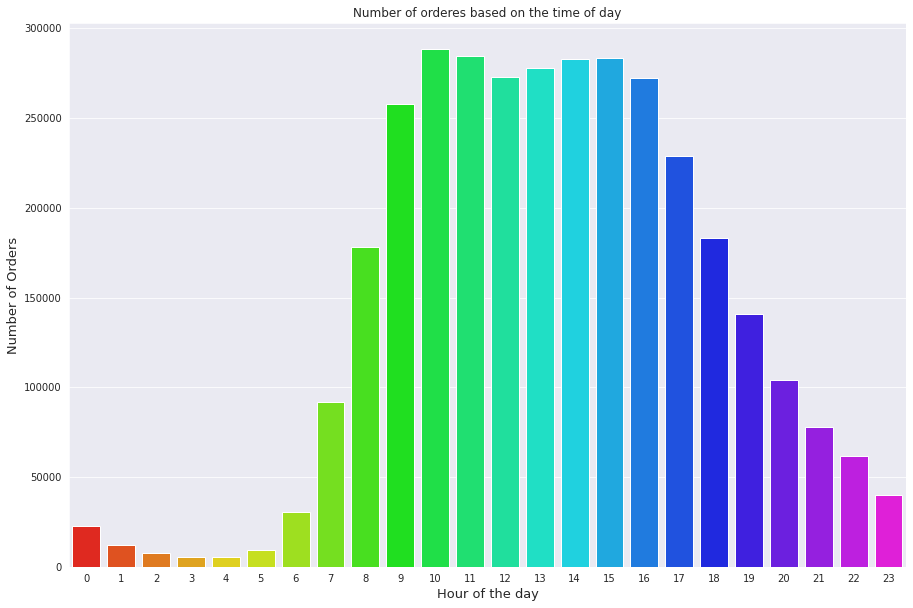

In [115]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(group_time["order_hour_of_day"],group_time["count_orders"], palette='gist_rainbow')
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Hour of the day', fontsize=13)
plt.title('Number of orderes based on the time of day')
plt.show()

In [116]:
#number of orders based on the time
group_week = orders_df.groupby("order_dow")["order_id"].agg(count_orders = "count").reset_index()
group_week = group_week.sort_values(by="count_orders", ascending = True).reset_index()

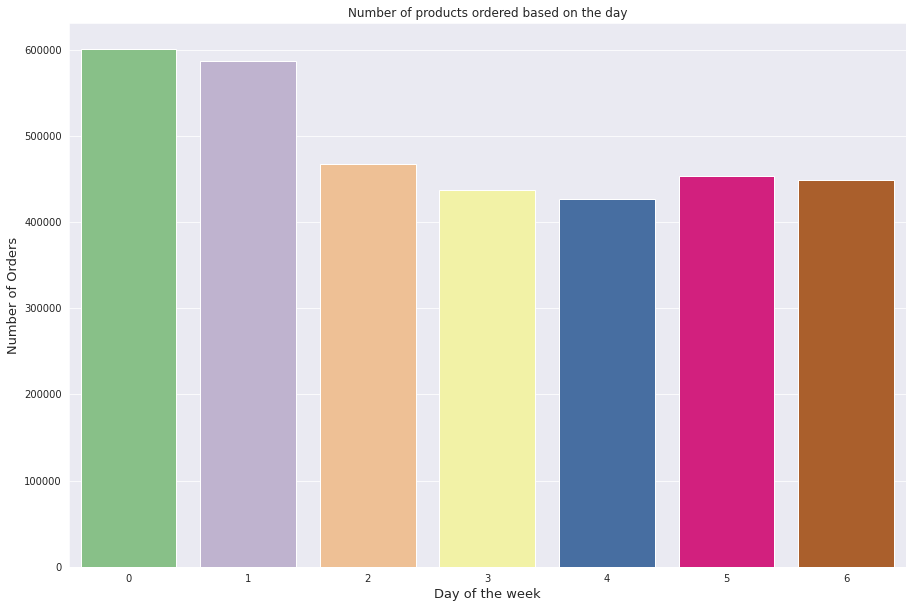

In [117]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(group_week["order_dow"],group_week["count_orders"], palette='Accent')
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Day of the week', fontsize=13)
plt.title('Number of products ordered based on the day')
plt.show()

# Exploring Aisles and Departments 

In [118]:
print(aisles_df.head())


   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [119]:
print(departments_df.head())

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [120]:
print(products_df.head())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [121]:
grouped_all = products_df.merge(departments_df, on = ["department_id"], how="left").merge(aisles_df, on=["aisle_id"], how="left")

In [122]:
grouped_all

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,alcohol,spirits
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen,frozen vegan vegetarian
49685,49686,Artisan Baguette,112,3,bakery,bread
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,pets,cat food care


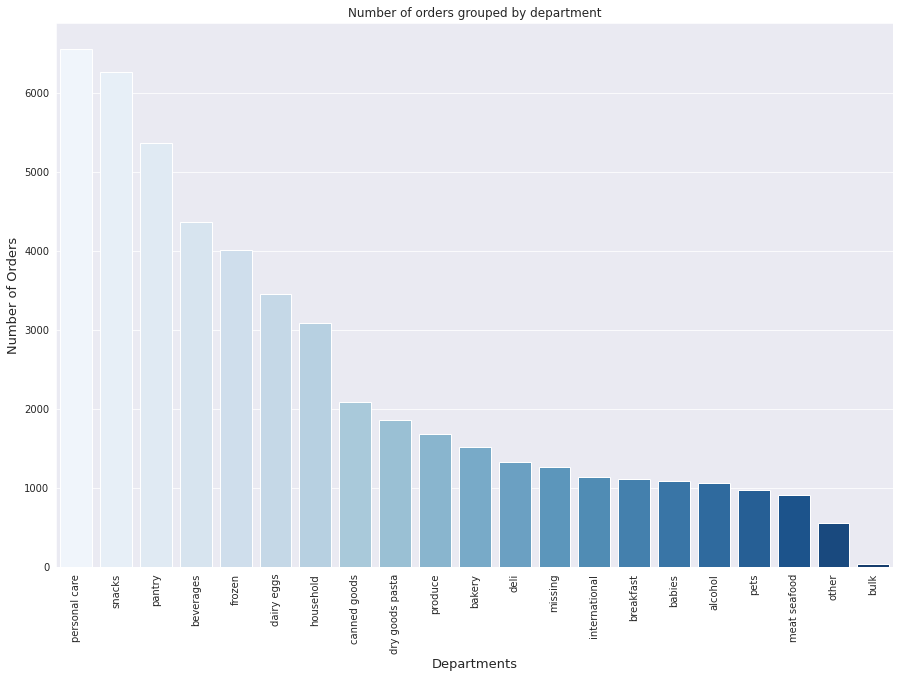

In [123]:
group_department = grouped_all.groupby("department")["product_name"].agg(count_orders = "count").reset_index()
group_department = group_department.sort_values(by="count_orders", ascending = False).reset_index()
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(group_department["department"],group_department["count_orders"], palette='Blues')
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.xticks(rotation=90)
plt.title("Number of orders grouped by department")
plt.show()

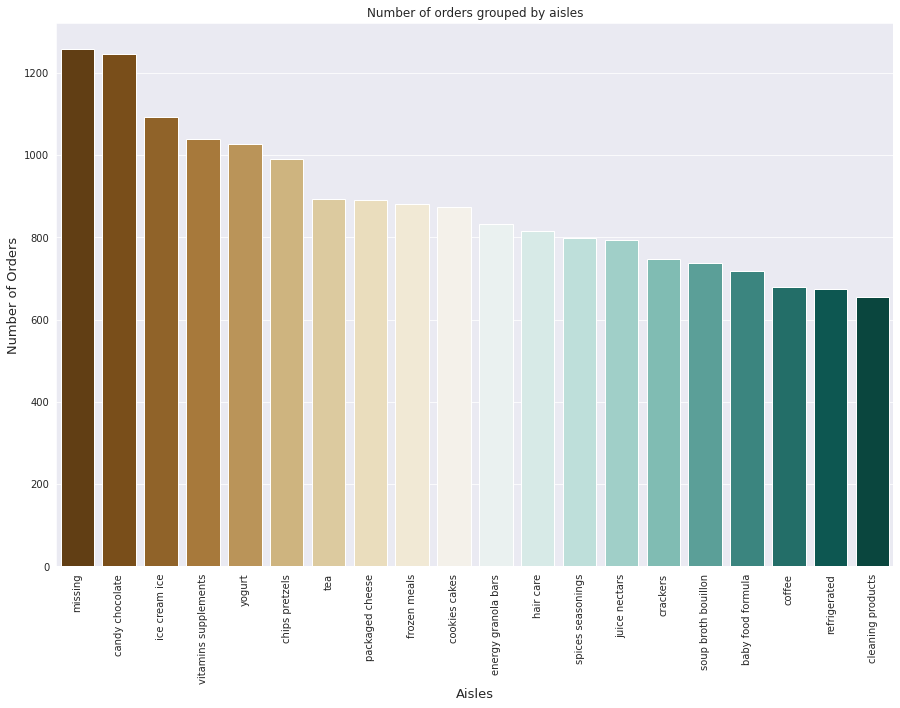

In [124]:
group_aisle = grouped_all.groupby("aisle")["product_name"].agg(count_orders = "count").reset_index()
group_aisle = group_aisle.sort_values(by="count_orders", ascending = False)[:20]
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(group_aisle["aisle"],group_aisle["count_orders"], palette='BrBG')
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.title("Number of orders grouped by aisles")
plt.xticks(rotation=90)
plt.show()